# Movie Rating Prediction with Python

In [279]:
#import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [257]:
#Loading dataset
data = pd.read_csv('movies.csv', encoding='latin1')

In [288]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,4.4,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.4,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",4.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",4.4,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [259]:
data.shape

(15509, 10)

In [260]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


## Cleaning the Data ##

In [261]:
#checking for null values
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [262]:
# drop null values
data.dropna(inplace=True)

In [263]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.3+ KB


In [264]:
data.describe

<bound method NDFrame.describe of                                      Name    Year Duration  \
1      #Gadhvi (He thought he was Gandhi)  (2019)  109 min   
3                                 #Yaaram  (2019)  110 min   
5                    ...Aur Pyaar Ho Gaya  (1997)  147 min   
6                               ...Yahaan  (2005)  142 min   
8                      ?: A Question Mark  (2012)   82 min   
...                                   ...     ...      ...   
15493                              Zubaan  (2015)  115 min   
15494                            Zubeidaa  (2001)  153 min   
15503                     Zulm Ki Zanjeer  (1989)  125 min   
15505                               Zulmi  (1999)  129 min   
15508                        Zulm-O-Sitam  (1998)  130 min   

                           Genre  Rating  Votes         Director  \
1                          Drama     7.0      8    Gaurav Bakshi   
3                Comedy, Romance     4.4     35       Ovais Khan   
5         Comedy,

In [265]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


## Visualisation of Data ##

In [155]:
movie_rating = data.groupby(['Name'], as_index=False)['Rating'].sum().sort_values(by='Rating', ascending=False).head(10)

In [156]:
movie_rating

,Name,Rating
588,Baazi,26.5
1884,Guru,25.5
5366,Zindagi,23.1
1296,Devdas,21.7
2079,Hum Dono,20.4
4294,Sanjog,20.1
3014,Maa,19.6
1520,Dushman,19.4
2232,Ittefaq,19.1
389,Anari,18.9


Text(0.5, 1.0, 'Top 10 Movies by Average Rating')

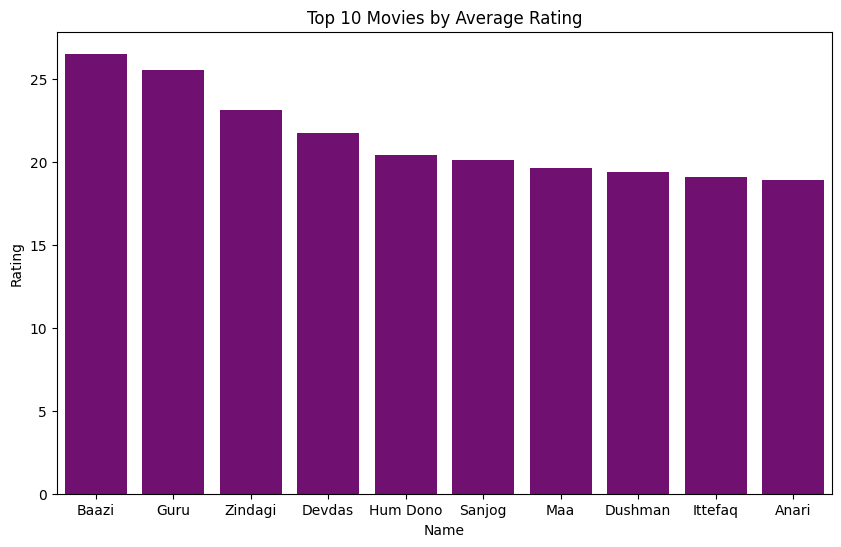

In [159]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Name', y= 'Rating' ,data = movie_rating, color='purple')
plt.title('Top 10 Movies by Average Rating')

In [160]:
# Calculate average rating for each director
director_ratings = data.groupby('Director')['Rating'].mean().sort_values(ascending=False)

In [161]:
# Select top 10 directors
top_directors = director_ratings.head(10)
top_directors

Director
Saif Ali Sayeed    10.0
Sriram Raja         9.7
Munni Pankaj        9.4
Suhrud Godbole      9.4
Arvind Pratap       9.4
Venkatesh Bk        9.3
Sapna Bhavnani      9.3
Vishwa Bhanu        9.3
Rahul Mallick       9.3
Gautam Joshi        9.3
Name: Rating, dtype: float64

In [276]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Admin\AppData\Local\Temp\ipykernel_11860\3146414169.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.index, y=top_directors.values, palette='rainbow', legend=False)


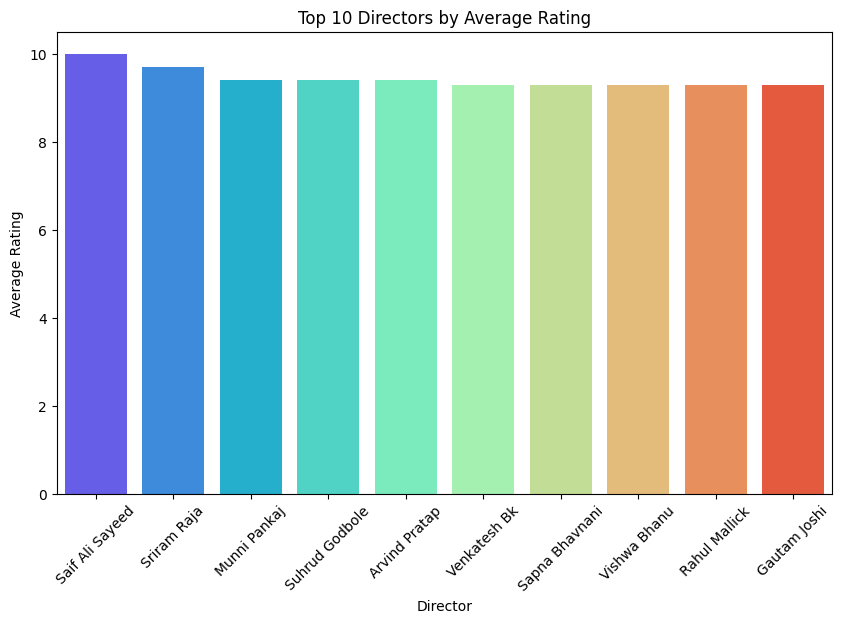

In [278]:

# Plot top 10 directors and their average ratings
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.index, y=top_directors.values, palette='rainbow', legend=False)
plt.xticks(rotation=45)
plt.xlabel('Director')
plt.ylabel('Average Rating')
plt.title('Top 10 Directors by Average Rating')
plt.show()

## Model Building ##

In [274]:
new_data = data.drop('Name',axis=1)

In [221]:
new_data['Duration'] = pd.to_numeric(new_data['Duration'].str.replace(r' min', '', regex=True), errors='coerce')

In [222]:
new_data['Votes'] = pd.to_numeric(new_data['Votes'].str.replace(',', ''), errors='coerce')

In [223]:
genre_mean_rating = new_data.groupby('Genre')['Rating'].transform('mean')
new_data['Genre_mean_rating'] = genre_mean_rating

In [224]:
director_mean_rating = new_data.groupby('Director')['Rating'].transform('mean')
new_data['Director_encoded'] = director_mean_rating

In [225]:
actor1_mean_rating = new_data.groupby('Actor 1')['Rating'].transform('mean')
new_data['Actor1_encoded'] = actor1_mean_rating

In [226]:
actor2_mean_rating = new_data.groupby('Actor 2')['Rating'].transform('mean')
new_data['Actor2_encoded'] = actor2_mean_rating

In [227]:
actor3_mean_rating = new_data.groupby('Actor 3')['Rating'].transform('mean')
new_data['Actor3_encoded'] = actor3_mean_rating

## Linear Regression Model ##

In [228]:
from sklearn.model_selection import train_test_split

In [229]:
#split the data 
X = new_data[['Votes', 'Duration', 'Genre_mean_rating','Director_encoded','Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]


In [230]:
y = data['Rating']

In [231]:
# Splitting the dataset into training and testing parts
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=20)

In [232]:
from sklearn.linear_model import LinearRegression

In [236]:
model = LinearRegression()

In [237]:
model.fit(X_train, y_train)

LinearRegression()

In [239]:
y_pred = model.predict(X_test)

In [240]:
y_pred

array([4.79113617, 6.90158541, 6.66835066, ..., 6.02192702, 7.54351365,
       6.61331123])

## Evaluation of Model ##

In [241]:
from sklearn.metrics import mean_squared_error,  r2_score

In [242]:
# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.3962499291084248


In [243]:
# Evaluate the model using r2 score
r2 = r2_score(y_test, y_pred)
print(f'r2 Score: {r2}')

r2 Score: 0.795302638404679


In [244]:
X.head()

,Votes,Duration,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
1,8,109,6.415521,7.000000,6.850000,7.000000,7.000000
3,35,110,5.716822,4.400000,5.420000,4.400000,4.450000
5,827,147,6.242222,5.313333,4.788889,5.786667,5.872727
6,1086,142,6.820000,7.383333,5.435000,6.933333,6.500000
8,326,82,5.477778,5.600000,5.600000,5.883333,5.600000


In [245]:
y.head()

1    7.0
3    4.4
5    4.7
6    7.4
8    5.6
Name: Rating, dtype: float64

## Predicting Movie Rating ##

In [253]:
#Predicting movie rating by given inputs of movie
data_dict = {'Votes': [35], 'Duration': [110], 'Genre_mean_rating': [5.7], 'Director_encoded': [4.4], 'Actor1_encoded': [5.4], 'Actor2_encoded': [4.4], 'Actor3_encoded': [4.45]}
df = pd.DataFrame(data_dict)

In [254]:
#Predict the rating using linear regression model
predicted_rating = model.predict(df)


In [269]:
# Display the predicted rating
print("Predicted Rating:", predicted_rating)

Predicted Rating: [4.19954151]


In [266]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [281]:
row_3 = data.iloc[1]
print(row_3)

Name                #Yaaram
Year                 (2019)
Duration            110 min
Genre       Comedy, Romance
Rating                  4.4
Votes                    35
Director         Ovais Khan
Actor 1             Prateik
Actor 2          Ishita Raj
Actor 3     Siddhant Kapoor
Name: 3, dtype: object


In [284]:
#Display Actual Rating
actual_rating = data.iloc[1]['Rating']
print("Actual Rating:", actual_rating)

Actual Rating: 4.4


In [285]:
# Display the predicted rating
print("Predicted Rating:", predicted_rating)

Predicted Rating: [4.19954151]
